--- Sample Data ---
   SquareFeet  Bedrooms  Bathrooms  Age   Price
0        1500         3        2.0   10  300000
1        1800         4        3.0    5  450000
2        2400         3        2.0   12  480000
3        1300         2        1.0   20  250000
4        2000         4        3.0    3  520000


--- Model Coefficients ---
Intercept: -123162.0610247557
Coefficients: [   161.05354059 -13326.61677221 119679.52408367   2398.29207446]
              Coefficient
SquareFeet     161.053541
Bedrooms    -13326.616772
Bathrooms   119679.524084
Age           2398.292074


--- Predictions vs Actual ---
   Actual Price  Predicted Price
8        680000    625672.615621
1        450000    484457.877567


--- Model Evaluation ---
Mean Absolute Error (MAE): 44392.63
Mean Squared Error (MSE): 2069405009.94
Root Mean Squared Error (RMSE): 45490.71
R-squared (R²): 0.84




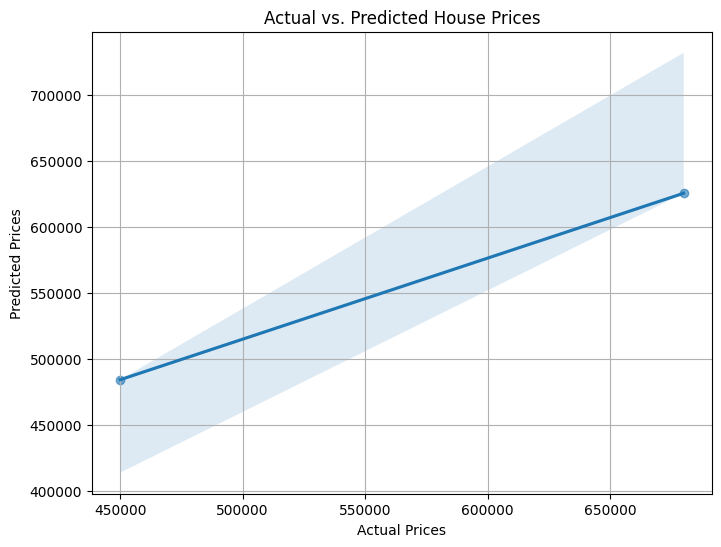

In [1]:

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create a sample dataset
# In a real-world scenario, you would load this from a CSV file
# For example: df = pd.read_csv('house_prices.csv')
data = {
    'SquareFeet': [1500, 1800, 2400, 1300, 2000, 1650, 2200, 1900, 2700, 1400],
    'Bedrooms': [3, 4, 3, 2, 4, 3, 4, 3, 5, 2],
    'Bathrooms': [2, 3, 2, 1, 3, 2, 3, 2.5, 3, 1.5],
    'Age': [10, 5, 12, 20, 3, 8, 4, 7, 9, 15],
    'Price': [300000, 450000, 480000, 250000, 520000, 380000, 550000, 470000, 680000, 280000]
}
df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print("--- Sample Data ---")
print(df.head())
print("\n")

# Step 3: Define Features (X) and Target (y)
# We use all columns except 'Price' as our features
X = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Age']]
# The 'Price' column is our target variable
y = df['Price']

# Step 4: Split the data into training and testing sets
# We'll use 80% of the data for training and 20% for testing
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model coefficients
print("--- Model Coefficients ---")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
# Create a dataframe for better visualization of coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
print("\n")

# Step 6: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs. predicted values
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("--- Predictions vs Actual ---")
print(predictions_df)
print("\n")


# Step 7: Evaluate the Model's Performance
print('--- Model Evaluation ---')
# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# R-squared (R²) Score
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2:.2f}')
print("\n")


# Optional: Visualize the results
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()
